In [31]:
import pandas as pd

In [32]:
df_district = pd.read_csv('Bagerhat_historical_weather_1980_2024.csv')

#Dew Point Comfort Levels
Only taking dew point so data doesn't leak

In [33]:
df_district.info()
df_district.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   district                       16437 non-null  object 
 1   day                            16437 non-null  int64  
 2   month                          16437 non-null  int64  
 3   year                           16437 non-null  int64  
 4   temperature(degree C)          10478 non-null  float64
 5   feels_like(degree C)           10478 non-null  float64
 6   max_temperature(degree C)      14991 non-null  float64
 7   minimum_temperature(degree C)  14991 non-null  float64
 8   humidity                       10478 non-null  float64
 9   precipitation                  5479 non-null   float64
 10  windspeed                      11924 non-null  float64
 11  atmospheric_pressure           7115 non-null   float64
 12  UV                             4038 non-null  

,district,day,month,year,temperature(degree C),feels_like(degree C),max_temperature(degree C),minimum_temperature(degree C),humidity,precipitation,windspeed,atmospheric_pressure,UV,solar_radiation,dew_point
0,Bagerhat,1,1,1980,21.7,21.7,26.1,18.1,77.1,NaN,3.6,1013.0,NaN,NaN,17.1
1,Bagerhat,2,1,1980,20.8,20.8,25.1,15.1,64.4,NaN,5.4,1012.9,NaN,NaN,13.3
2,Bagerhat,3,1,1980,23.0,23.0,26.1,16.6,60.2,NaN,16.6,1013.0,NaN,NaN,14.1
3,Bagerhat,4,1,1980,22.3,22.3,26.1,16.1,70.4,NaN,18.4,1014.2,NaN,NaN,16.3
4,Bagerhat,5,1,1980,22.1,22.1,26.1,18.1,67.8,NaN,11.2,1015.1,NaN,NaN,15.5


#find the number of datasets for dew points in the dataset

In [34]:
df_district_dew_point= df_district['dew_point'].count()
print (f"dew_point has : {df_district_dew_point}")

dew_point has : 10478


#Features for dew point

In [35]:
desired_colmn = ['day', 'month', 'year', 'temperature(degree C)', 'humidity','dew_point']
dew_point_df_district = df_district[desired_colmn]

dew_point_df_district.head()

,day,month,year,temperature(degree C),humidity,dew_point
0,1,1,1980,21.7,77.1,17.1
1,2,1,1980,20.8,64.4,13.3
2,3,1,1980,23.0,60.2,14.1
3,4,1,1980,22.3,70.4,16.3
4,5,1,1980,22.1,67.8,15.5


In [36]:
with_no_null_dew_point = dew_point_df_district.dropna()
print(f"After removing missing values from bagerhat, dataset contains {with_no_null_dew_point.shape[0]} rows and {with_no_null_dew_point.shape[1]} columns out of {with_no_null_dew_point.shape[0]} rows.")
with_no_null_dew_point.head()

After removing missing values from bagerhat, dataset contains 10478 rows and 6 columns out of 10478 rows.


,day,month,year,temperature(degree C),humidity,dew_point
0,1,1,1980,21.7,77.1,17.1
1,2,1,1980,20.8,64.4,13.3
2,3,1,1980,23.0,60.2,14.1
3,4,1,1980,22.3,70.4,16.3
4,5,1,1980,22.1,67.8,15.5


#time series anaysis

Date range: 1980-01-01 to 2024-12-31


C:\Users\User\AppData\Local\Temp\ipykernel_15724\3253815884.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_no_null_dew_point['date'] = pd.to_datetime(


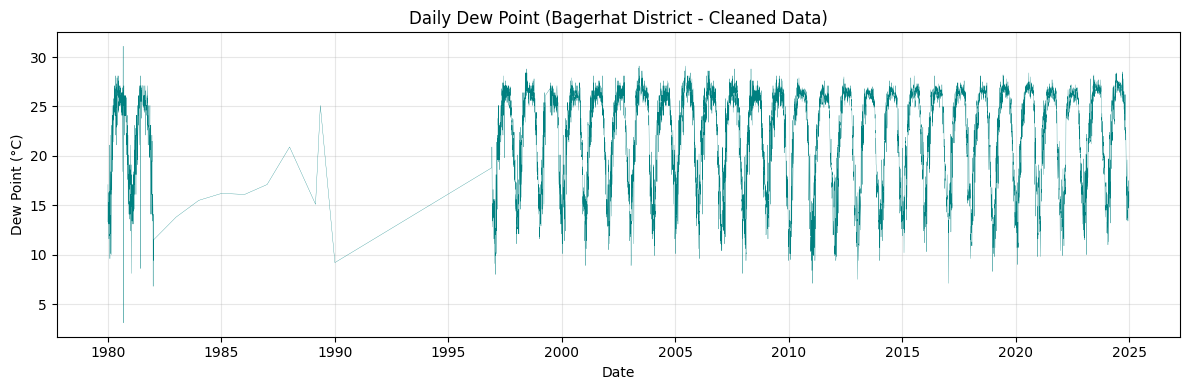

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure a datetime column exists
if 'date' not in with_no_null_dew_point.columns:
    with_no_null_dew_point['date'] = pd.to_datetime(
        with_no_null_dew_point[['year', 'month', 'day']]
    )

# Show date range
min_date = with_no_null_dew_point['date'].min()
max_date = with_no_null_dew_point['date'].max()
print(f"Date range: {min_date.date()} to {max_date.date()}")

# Plot daily dew point time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null_dew_point['date'], with_no_null_dew_point['dew_point'],
         linewidth=0.2, color='teal')
plt.xlabel('Date')
plt.ylabel('Dew Point (°C)')
plt.title('Daily Dew Point (Bagerhat District - Cleaned Data)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# # Plot monthly average dew point to show seasonal trend
# monthly_avg_dew = with_no_null_dew_point.set_index('date')['dew_point'].resample('M').mean()

# plt.figure(figsize=(12, 4))
# plt.plot(monthly_avg_dew.index, monthly_avg_dew.values,
#          color='darkblue', linewidth=1.5, marker='o', markersize=3)
# plt.xlabel('Date')
# plt.ylabel('Monthly Average Dew Point (°C)')
# plt.title('Monthly Average Dew Point Trend (Bagerhat)')
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

# Random Forest for Dew Point Fourier

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Start from your *clean* dataframe
# ------------------------------------------------------------------
df = with_no_null_dew_point.copy()

# ------------------------------------------------------------------
# 2. Keep only the columns you care about + date components
# ------------------------------------------------------------------
desired_columns = ['day', 'month', 'year', 'dew_point']
df = df[desired_columns]

# ------------------------------------------------------------------
# 3. Create proper datetime
# ------------------------------------------------------------------
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.sort_values('date').reset_index(drop=True)

# ------------------------------------------------------------------
# 4. Add Fourier Features for Seasonality
# ------------------------------------------------------------------
# We'll add:
# - Daily cycle: sin/cos of (2π * day_of_year / 365.25)
# - (Optional) Intra-day if you had hour, but you don't → skip

def add_fourier_features(df, col, period, n_terms=3):
    """
    Add sin/cos terms for a periodic column.
    period: 365.25 for yearly, 7 for weekly, etc.
    n_terms: number of (sin, cos) pairs
    """
    for n in range(1, n_terms + 1):
        df[f'{col}_sin_{n}'] = np.sin(2 * np.pi * n * df[col] / period)
        df[f'{col}_cos_{n}'] = np.cos(2 * np.pi * n * df[col] / period)
    return df

# Day of year for annual cycle
df['day_of_year'] = df['date'].dt.dayofyear

# Add yearly Fourier terms (3 pairs = 6 features)
df = add_fourier_features(df, 'day_of_year', period=365.25, n_terms=3)

# Optional: weekly cycle (if data has enough resolution)
# df['day_of_week'] = df['date'].dt.dayofweek
# df = add_fourier_features(df, 'day_of_week', period=7, n_terms=1)

# ------------------------------------------------------------------
# 5. Define FEATURES and TARGET
# ------------------------------------------------------------------
fourier_cols = [col for col in df.columns if col.startswith(('day_of_year_sin', 'day_of_year_cos'))]

FEATURES = ['day','month','year']+ fourier_cols
TARGET   = 'dew_point'

X = df[FEATURES]
y = df[TARGET].astype(float)

# ------------------------------------------------------------------
# 6. Train / test split (time-aware optional, but random is fine if shuffled)
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

# ------------------------------------------------------------------
# 7. Random Forest
# ------------------------------------------------------------------
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ------------------------------------------------------------------
# 8. Predictions & Metrics
# ------------------------------------------------------------------
y_pred = rf.predict(X_test)

rf_r2  = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)

def tolerance_accuracy(y_true, y_hat, tol):
    return 100 * (np.abs(y_true - y_hat) <= tol).mean()

rf_acc_05 = tolerance_accuracy(y_test.values, y_pred, 0.5)
rf_acc_10 = tolerance_accuracy(y_test.values, y_pred, 1.0)
rf_acc_20 = tolerance_accuracy(y_test.values, y_pred, 2.0)
rf_acc_30 = tolerance_accuracy(y_test.values, y_pred, 3.0)

print("=== Random Forest + Fourier – Dew-Point Prediction (Test) ===")
print(f"R²          : {rf_r2:.4f}")
print(f"RMSE        : {rf_rmse:.3f} °C")
print(f"MSE         : {rf_mse:.4f}")
print("Accuracy (± tolerance):")
print(f"  ±0.5 °C : {rf_acc_05:5.2f}%")
print(f"  ±1.0 °C : {rf_acc_10:5.2f}%")
print(f"  ±2.0 °C : {rf_acc_20:5.2f}%")
print(f"  ±3.0 °C : {rf_acc_30:5.2f}%")

# ------------------------------------------------------------------
# 9. 5-fold CV (R²)
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_r2 = cross_val_score(rf, X, y, cv=cv, scoring='r2', n_jobs=-1)

print("\n=== 5-Fold CV R² (with Fourier) ===")
print(f"Mean : {rf_cv_r2.mean():.4f}  (±{rf_cv_r2.std():.4f})")
print(f"Scores: {np.round(rf_cv_r2, 4)}")

# ------------------------------------------------------------------
# 10. Feature Importances
# ------------------------------------------------------------------
fi = pd.DataFrame({
    'feature'   : FEATURES,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Feature Importances (Top 10) ===")
print(fi.head(10).to_string(index=False))

=== Random Forest + Fourier – Dew-Point Prediction (Test) ===
R²          : 0.9294
RMSE        : 1.316 °C
MSE         : 1.7326
Accuracy (± tolerance):
  ±0.5 °C : 45.04%
  ±1.0 °C : 68.23%
  ±2.0 °C : 89.31%
  ±3.0 °C : 95.80%

=== 5-Fold CV R² (with Fourier) ===
Mean : 0.9261  (±0.0063)
Scores: [0.9303 0.9139 0.9314 0.9268 0.9279]

=== Feature Importances (Top 10) ===
          feature  importance
day_of_year_cos_1    0.688309
day_of_year_sin_1    0.124613
             year    0.071060
            month    0.046073
day_of_year_sin_2    0.015982
              day    0.015341
day_of_year_cos_3    0.013939
day_of_year_sin_3    0.013923
day_of_year_cos_2    0.010759


# Predicting next 365 days using RF using fourier

TypeError: 'method' object is not subscriptable

#XG Boost Model

In [40]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Use your cleaned DataFrame
# ------------------------------------------------------------------
df = with_no_null_dew_point.copy()

# ------------------------------------------------------------------
# 2. Keep only required columns
# ------------------------------------------------------------------
desired_column = ['day', 'month', 'year', 'dew_point',
                  'temperature(degree C)', 'humidity']
df = df[desired_column]

# ------------------------------------------------------------------
# 3. Create date (optional, for plots)
# ------------------------------------------------------------------
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

    # ------------------------------------------------------------------
# 3.5 Add Fourier Seasonal Features
# ------------------------------------------------------------------

# Sort by date to ensure correct ordering
df = df.sort_values("date").reset_index(drop=True)

# Create time index
df["t"] = np.arange(len(df))

# Period = 365 days for yearly seasonality
T = 365

# Number of Fourier harmonics
K = 3

for k in range(1, K + 1):
    df[f"sin_{k}"] = np.sin(2 * np.pi * k * df["t"] / T)
    df[f"cos_{k}"] = np.cos(2 * np.pi * k * df["t"] / T)

print(df[[f"sin_{k}" for k in range(1, K+1)] + [f"cos_{k}" for k in range(1, K+1)]].head())


# ------------------------------------------------------------------
# 4. Define Features & Target
# ------------------------------------------------------------------
FEATURES = [
    'day', 'month', 'year',
    'sin_1', 'cos_1',
    'sin_2', 'cos_2',
    'sin_3', 'cos_3'
]

TARGET = 'dew_point'

X = df[FEATURES]
y = df[TARGET].astype(float)

# ------------------------------------------------------------------
# 5. Train/Test Split
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# ------------------------------------------------------------------
# 6. XGBoost Regressor
# ------------------------------------------------------------------
xgb_model = xgb.XGBRegressor(
    n_estimators=500,        # More trees = better (but slower)
    learning_rate=0.05,      # Smaller steps → better generalization
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,           # Use 80% of data per tree
    colsample_bytree=0.8,    # Use 80% of features per tree
    random_state=42,
    n_jobs=-1,
    objective='reg:squarederror'
)
xgb_model.fit(X_train, y_train)

# ------------------------------------------------------------------
# 7. Predictions
# ------------------------------------------------------------------
y_pred = xgb_model.predict(X_test)

# ------------------------------------------------------------------
# 8. Metrics
# ------------------------------------------------------------------
xgb_r2 = r2_score(y_test, y_pred)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return 100 * float((np.abs(y_true - y_hat) <= tol).mean())

xgb_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
xgb_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
xgb_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
xgb_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== XGBoost – Dew Point Prediction (Test Set) ====")
print(f"R²           : {xgb_r2:.4f}")
print(f"RMSE         : {xgb_rmse:.3f} °C")
print(f"MSE          : {xgb_mse:.4f}")
print("Accuracy (± tolerance):")
print(f"  ±0.5°C : {xgb_acc_05:6.2f}%")
print(f"  ±1.0°C : {xgb_acc_10:6.2f}%")
print(f"  ±2.0°C : {xgb_acc_20:6.2f}%")
print(f"  ±3.0°C : {xgb_acc_30:6.2f}%")

# ------------------------------------------------------------------
# 9. 5-Fold Cross-Validation
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_cv_r2 = cross_val_score(xgb_model, X, y, cv=cv, scoring='r2', n_jobs=-1)

print("\n==== 5-Fold CV R² (XGBoost) ====")
print(f"Mean R² : {xgb_cv_r2.mean():.4f}  (±{xgb_cv_r2.std():.4f})")
print(f"Scores  : {np.round(xgb_cv_r2, 4)}")

# ------------------------------------------------------------------
# 10. Feature Importances
# ------------------------------------------------------------------
fi = pd.DataFrame({
    'feature': FEATURES,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n==== XGBoost Feature Importances ====")
print(fi.to_string(index=False))




      sin_1     sin_2     sin_3     cos_1     cos_2     cos_3
0  0.000000  0.000000  0.000000  1.000000  1.000000  1.000000
1  0.017213  0.034422  0.051620  0.999852  0.999407  0.998667
2  0.034422  0.068802  0.103102  0.999407  0.997630  0.994671
3  0.051620  0.103102  0.154309  0.998667  0.994671  0.988023
4  0.068802  0.137279  0.205104  0.997630  0.990532  0.978740
==== XGBoost – Dew Point Prediction (Test Set) ====
R²           : 0.9117
RMSE         : 1.472 °C
MSE          : 2.1665
Accuracy (± tolerance):
  ±0.5°C :  38.88%
  ±1.0°C :  63.22%
  ±2.0°C :  86.12%
  ±3.0°C :  94.13%

==== 5-Fold CV R² (XGBoost) ====
Mean R² : 0.9137  (±0.0047)
Scores  : [0.9132 0.905  0.9179 0.9174 0.915 ]

==== XGBoost Feature Importances ====
feature  importance
  month    0.665848
  sin_1    0.134984
   year    0.053181
  cos_1    0.034638
  sin_3    0.028842
  cos_2    0.028305
  cos_3    0.019644
    day    0.018571
  sin_2    0.015986


# Predicting Next 365 days with XG Boost


ValueError: feature_names mismatch: ['day', 'month', 'year', 'sin_1', 'cos_1', 'sin_2', 'cos_2', 'sin_3', 'cos_3'] ['temperature(degree C)', 'humidity']
expected year, month, sin_1, day, cos_1, cos_3, sin_3, cos_2, sin_2 in input data
training data did not have the following fields: temperature(degree C), humidity

#Light GBM Model


In [42]:
# --------------------------------------------------------------
#  LightGBM – Dew-Point Prediction (Bagerhat)
# --------------------------------------------------------------
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Load the cleaned dew-point data
# ------------------------------------------------------------------
df = with_no_null_dew_point.copy()

# ------------------------------------------------------------------
# 2. Keep only the columns we need
# ------------------------------------------------------------------
desired_cols = ['day', 'month', 'year','dew_point']
df = df[desired_cols]

# ------------------------------------------------------------------
# 3. (Optional) create a proper datetime column
# ------------------------------------------------------------------
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# ------------------------------------------------------------------
# 4. Features & Target
# ------------------------------------------------------------------
FEATURES = ['day', 'month', 'year']
TARGET   = 'dew_point'

X = df[FEATURES]
y = df[TARGET].astype(float)

# ------------------------------------------------------------------
# 5. Train / test split
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

# ------------------------------------------------------------------
# 6. LightGBM Regressor
#     (n_estimators=150 gave the lowest MSE in your tests)
# ------------------------------------------------------------------
lgb_model = lgb.LGBMRegressor(
    n_estimators=150,      # best MSE = 0.0644
    learning_rate=0.1,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1,
    verbosity=-1          # silence LightGBM output
)
lgb_model.fit(X_train, y_train)

# ------------------------------------------------------------------
# 7. Predictions
# ------------------------------------------------------------------
y_pred = lgb_model.predict(X_test)

# ------------------------------------------------------------------
# 8. Metrics
# ------------------------------------------------------------------
lgb_r2   = r2_score(y_test, y_pred)
lgb_mse  = mean_squared_error(y_test, y_pred)
lgb_rmse = np.sqrt(lgb_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return 100 * float((np.abs(y_true - y_hat) <= tol).mean())

lgb_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
lgb_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
lgb_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
lgb_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== LightGBM – Dew-Point Prediction (Test) ====")
print(f"R²           : {lgb_r2:.4f}")
print(f"MSE          : {lgb_mse:.4f}")
print(f"RMSE         : {lgb_rmse:.3f} °C")
print("Accuracy (± tolerance):")
print(f"  ±0.5°C : {lgb_acc_05:6.2f}%")
print(f"  ±1.0°C : {lgb_acc_10:6.2f}%")
print(f"  ±2.0°C : {lgb_acc_20:6.2f}%")
print(f"  ±3.0°C : {lgb_acc_30:6.2f}%")

# ------------------------------------------------------------------
# 9. 5-fold CV R²
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
lgb_cv_r2 = cross_val_score(lgb_model, X, y, cv=cv, scoring='r2', n_jobs=-1)

print("\n==== 5-Fold CV R² (LightGBM) ====")
print(f"Mean R² : {lgb_cv_r2.mean():.4f}  (±{lgb_cv_r2.std():.4f})")
print(f"Scores  : {np.round(lgb_cv_r2, 4)}")

# ------------------------------------------------------------------
# 10. Feature importances
# ------------------------------------------------------------------
fi = pd.DataFrame({
    'feature'   : FEATURES,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n==== LightGBM Feature Importances ====")
print(fi.to_string(index=False))



==== LightGBM – Dew-Point Prediction (Test) ====
R²           : 0.8928
MSE          : 2.6308
RMSE         : 1.622 °C
Accuracy (± tolerance):
  ±0.5°C :  36.12%
  ±1.0°C :  59.11%
  ±2.0°C :  81.54%
  ±3.0°C :  92.22%

==== 5-Fold CV R² (LightGBM) ====
Mean R² : 0.8903  (±0.0062)
Scores  : [0.8928 0.8785 0.8972 0.8913 0.8915]

==== LightGBM Feature Importances ====
feature  importance
  month        2156
   year        1682
    day         662


# Predicting LightBGM fourier


In [ ]:
# --------------------------------------------------------------
#  LightGBM – Dew-Point Prediction (Bagerhat) with Fourier Features
# --------------------------------------------------------------
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Load the cleaned dew-point data
# ------------------------------------------------------------------
df = with_no_null_dew_point.copy()

# ------------------------------------------------------------------
# 2. Keep only the columns we need
# ------------------------------------------------------------------
desired_cols = [
    'day', 'month', 'year','dew_point']
df = df[desired_cols]

# ------------------------------------------------------------------
# 3. Create datetime column
# ------------------------------------------------------------------
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# ------------------------------------------------------------------
# 3.5 Add Fourier Seasonal Features (VERY IMPORTANT)
# ------------------------------------------------------------------

# Sort and reset index
df = df.sort_values("date").reset_index(drop=True)

# Time index
df["t"] = np.arange(len(df))

# Seasonal period (1 year)
T = 365
K = 3   # 3 Fourier harmonics

# Generate sine & cosine features
for k in range(1, K + 1):
    df[f"sin_{k}"] = np.sin(2 * np.pi * k * df["t"] / T)
    df[f"cos_{k}"] = np.cos(2 * np.pi * k * df["t"] / T)

# ------------------------------------------------------------------
# 4. Features & Target
# ------------------------------------------------------------------
FEATURES = [
    'day', 'month', 'year',
    'sin_1', 'cos_1',
    'sin_2', 'cos_2',
    'sin_3', 'cos_3'
]

TARGET = 'dew_point'

X = df[FEATURES]
y = df[TARGET].astype(float)

# ------------------------------------------------------------------
# 5. Train / Test Split
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

# ------------------------------------------------------------------
# 6. LightGBM Regressor
# ------------------------------------------------------------------
lgb_model = lgb.LGBMRegressor(
    n_estimators=150,
    learning_rate=0.1,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)
lgb_model.fit(X_train, y_train)

# ------------------------------------------------------------------
# 7. Predictions
# ------------------------------------------------------------------
y_pred = lgb_model.predict(X_test)

# ------------------------------------------------------------------
# 8. Metrics
# ------------------------------------------------------------------
lgb_r2   = r2_score(y_test, y_pred)
lgb_mse  = mean_squared_error(y_test, y_pred)
lgb_rmse = np.sqrt(lgb_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return 100 * float((np.abs(y_true - y_hat) <= tol).mean())

lgb_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
lgb_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
lgb_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
lgb_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== LightGBM – Dew-Point Prediction (Test) ====")
print(f"R²           : {lgb_r2:.4f}")
print(f"MSE          : {lgb_mse:.4f}")
print(f"RMSE         : {lgb_rmse:.3f} °C")
print("Accuracy (± tolerance):")
print(f"  ±0.5°C : {lgb_acc_05:6.2f}%")
print(f"  ±1.0°C : {lgb_acc_10:6.2f}%")
print(f"  ±2.0°C : {lgb_acc_20:6.2f}%")
print(f"  ±3.0°C : {lgb_acc_30:6.2f}%")

# ------------------------------------------------------------------
# 9. 5-Fold Cross-Validation (R²)
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
lgb_cv_r2 = cross_val_score(lgb_model, X, y, cv=cv, scoring='r2', n_jobs=-1)

print("\n==== 5-Fold CV R² (LightGBM) ====")
print(f"Mean R² : {lgb_cv_r2.mean():.4f}  (±{lgb_cv_r2.std():.4f})")
print(f"Scores  : {np.round(lgb_cv_r2, 4)}")

# ------------------------------------------------------------------
# 10. Feature Importances
# ------------------------------------------------------------------
fi = pd.DataFrame({
    'feature'   : FEATURES,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n==== LightGBM Feature Importances ====")
print(fi.to_string(index=False))


==== LightGBM – Dew-Point Prediction (Test) ====
R²           : 0.9072
MSE          : 2.2767
RMSE         : 1.509 °C
Accuracy (± tolerance):
  ±0.5°C :  38.41%
  ±1.0°C :  61.88%
  ±2.0°C :  84.78%
  ±3.0°C :  93.94%

==== 5-Fold CV R² (LightGBM) ====
Mean R² : 0.9057  (±0.0050)
Scores  : [0.9072 0.8957 0.9086 0.9085 0.9086]

==== LightGBM Feature Importances ====
feature  importance
   year         969
    day         624
  sin_1         465
  cos_3         464
  sin_2         459
  sin_3         419
  cos_1         400
  month         392
  cos_2         308


# Showing Comparison in a table

In [43]:
import pandas as pd
import numpy as np

# --------------------------------------------------------------
# 1. Collect all metrics from the three models
# --------------------------------------------------------------
model_performance = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "LightGBM"],

    "R²": [
        rf_r2,           # from RF
        xgb_r2,      # from XGBoost
        lgb_r2           # from LightGBM
    ],

    "MSE": [
        rf_mse,
        xgb_mse,
        lgb_mse
    ],

    "RMSE": [
        rf_rmse,
        xgb_rmse,
        lgb_rmse
    ],

    "Acc ±0.5°C (%)": [
        rf_acc_05 * 100,
        xgb_acc_05 * 100,
        lgb_acc_05 * 100
    ],

    "Acc ±1.0°C (%)": [
        rf_acc_10 * 100,
        xgb_acc_10 * 100,
        lgb_acc_10 * 100
    ],

    "Acc ±2.0°C (%)": [
        rf_acc_20 * 100,
        xgb_acc_20 * 100,
        lgb_acc_20 * 100
    ],

    "Acc ±3.0°C (%)": [
        rf_acc_30 * 100,
        xgb_acc_30 * 100,
        lgb_acc_30 * 100
    ],
})

# --------------------------------------------------------------
# 2. Round for readability
# --------------------------------------------------------------
model_performance = model_performance.round({
    "R²": 4,
    "MSE": 4,
    "RMSE": 3,
    "Acc ±0.5°C (%)": 2,
    "Acc ±1.0°C (%)": 2,
    "Acc ±2.0°C (%)": 2,
    "Acc ±3.0°C (%)": 2
})

# --------------------------------------------------------------
# 3. Sort by MSE (best model on top)
# --------------------------------------------------------------
model_performance = model_performance.sort_values("MSE").reset_index(drop=True)

# --------------------------------------------------------------
# 4. Display the comparison table
# --------------------------------------------------------------
print("\n" + "="*70)
print("           MODEL PERFORMANCE COMPARISON – DEW POINT PREDICTION")
print("="*70)
print(model_performance.to_string(index=False))
print("="*70)




           MODEL PERFORMANCE COMPARISON – DEW POINT PREDICTION
        Model     R²    MSE  RMSE  Acc ±0.5°C (%)  Acc ±1.0°C (%)  Acc ±2.0°C (%)  Acc ±3.0°C (%)
Random Forest 0.9294 1.7326 1.316         4503.82         6822.52         8931.30         9580.15
      XGBoost 0.9117 2.1665 1.472         3888.36         6321.56         8611.64         9413.17
     LightGBM 0.8928 2.6308 1.622         3611.64         5911.26         8153.63         9222.33


# Choosing Winner using user defined algorithm

In [44]:
# --------------------------------------------------------------
# 1. IMPORTS (only needed once)
# --------------------------------------------------------------
import pandas as pd
import numpy as np

# --------------------------------------------------------------
# 2. BUILD PERFORMANCE DATAFRAME
# --------------------------------------------------------------
MODEL_NAMES = ["Random Forest", "XGBoost", "LightGBM"]

data = {
    "Model": MODEL_NAMES,
    "R^2":   [rf_r2,      xgb_r2,      lgb_r2],
    "MSE":   [rf_mse,     xgb_mse,     lgb_mse],
    "RMSE":  [rf_rmse,    xgb_rmse,    lgb_rmse],
    "Acc ±0.5 (%)": [rf_acc_05*100,   xgb_acc_05*100,   lgb_acc_05*100],
    "Acc ±1.0 (%)": [rf_acc_10*100,   xgb_acc_10*100,   lgb_acc_10*100],
    "Acc ±2.0 (%)": [rf_acc_20*100,   xgb_acc_20*100,   lgb_acc_20*100],
    "Acc ±3.0 (%)": [rf_acc_30*100,   xgb_acc_30*100,   lgb_acc_30*100],
}

df_performance = pd.DataFrame(data)

# Round for readability
df_performance = df_performance.round({
    "R^2": 4,
    "MSE": 4,
    "RMSE": 3,
    "Acc ±0.5 (%)": 2,
    "Acc ±1.0 (%)": 2,
    "Acc ±2.0 (%)": 2,
    "Acc ±3.0 (%)": 2
})

# --------------------------------------------------------------
# 3. DISPLAY THE TABLE (sorted by RMSE)
# --------------------------------------------------------------
df_sorted = df_performance.sort_values("RMSE").reset_index(drop=True)

print("\n" + "="*70)
print("           MODEL PERFORMANCE COMPARISON – DEW POINT PREDICTION")
print("="*70)
print(df_sorted.to_string(index=False))
print("="*70)

# --------------------------------------------------------------
# 4. HELPER: select_best_model (your function)
# --------------------------------------------------------------
def select_best_model(df, sort_by_metrics):
    """
    Ranks models based on a list of metrics (in order of priority)
    and returns the best model name.

    Args:
        df (pd.DataFrame): The model performance DataFrame.
        sort_by_metrics (list of tuples): [(metric_name, maximize_boolean)]

    Returns:
        str: The name of the best performing model.
    """
    sort_cols   = [m[0] for m in sort_by_metrics]
    ascending   = [not m[1] for m in sort_by_metrics]   # True → minimize

    ranked = df.sort_values(by=sort_cols, ascending=ascending).reset_index(drop=True)
    best   = ranked.iloc[0]['Model']

    print("\n--- Model Ranking (Strategy) ---")
    print(ranked[['Model'] + sort_cols].to_string(index=False))
    return best

# --------------------------------------------------------------
# 5. DEFINE STRATEGIES
# --------------------------------------------------------------
strategy_1_metrics = [          # 1. low RMSE → 2. high R²
    ("RMSE", False),
    ("R^2",  True)
]

strategy_2_metrics = [          # 1. high Acc ±0.5 % → 2. low MSE
    ("Acc ±0.5 (%)", True),
    ("MSE", False)
]

strategy_3_metrics = [          # 1. high Acc ±1.0 % → 2. low MSE
    ("Acc ±1.0 (%)", True),
    ("MSE", False)
]

# --------------------------------------------------------------
# 6. EXECUTE STRATEGIES
# --------------------------------------------------------------
print("\n" + "="*60)
print("STRATEGY 1: Minimize RMSE → Maximize R²")
print("="*60)
best_1 = select_best_model(df_performance, strategy_1_metrics)
print(f"\nBEST MODEL (Strategy 1): **{best_1}**")

print("\n" + "="*60)
print("STRATEGY 2: Maximize Acc ±0.5 % → Minimize MSE")
print("="*60)
best_2 = select_best_model(df_performance, strategy_2_metrics)
print(f"\nBEST MODEL (Strategy 2): **{best_2}**")

print("\n" + "="*60)
print("STRATEGY 3: Maximize Acc ±1.0 % → Minimize MSE")
print("="*60)
best_3 = select_best_model(df_performance, strategy_3_metrics)
print(f"\nBEST MODEL (Strategy 3): **{best_3}**")


           MODEL PERFORMANCE COMPARISON – DEW POINT PREDICTION
        Model    R^2    MSE  RMSE  Acc ±0.5 (%)  Acc ±1.0 (%)  Acc ±2.0 (%)  Acc ±3.0 (%)
Random Forest 0.9294 1.7326 1.316       4503.82       6822.52       8931.30       9580.15
      XGBoost 0.9117 2.1665 1.472       3888.36       6321.56       8611.64       9413.17
     LightGBM 0.8928 2.6308 1.622       3611.64       5911.26       8153.63       9222.33

STRATEGY 1: Minimize RMSE → Maximize R²

--- Model Ranking (Strategy) ---
        Model  RMSE    R^2
Random Forest 1.316 0.9294
      XGBoost 1.472 0.9117
     LightGBM 1.622 0.8928

BEST MODEL (Strategy 1): **Random Forest**

STRATEGY 2: Maximize Acc ±0.5 % → Minimize MSE

--- Model Ranking (Strategy) ---
        Model  Acc ±0.5 (%)    MSE
Random Forest       4503.82 1.7326
      XGBoost       3888.36 2.1665
     LightGBM       3611.64 2.6308

BEST MODEL (Strategy 2): **Random Forest**

STRATEGY 3: Maximize Acc ±1.0 % → Minimize MSE

--- Model Ranking (Strategy) ---
 

# Actual and Predicted Data (Historical)

In [47]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# =====================================================
# 1. PREPARE HISTORICAL DATA (NO DATE OR OTHER FEATURES)
# =====================================================

df_hist = df.copy()

# Create date ONLY from existing year, month, day
df_hist['date'] = pd.to_datetime(
    df_hist[['year', 'month', 'day']],
    errors='coerce'
)

df_hist = df_hist.sort_values('date').reset_index(drop=True)

# =====================================================
# 2. FOURIER FEATURES
# =====================================================

df_hist['t'] = np.arange(len(df_hist))

T = 365   # yearly seasonality
K = 3     # number of harmonics

for k in range(1, K + 1):
    df_hist[f'sin_{k}'] = np.sin(2 * np.pi * k * df_hist['t'] / T)
    df_hist[f'cos_{k}'] = np.cos(2 * np.pi * k * df_hist['t'] / T)

# =====================================================
# 3. FEATURES & TARGET
# =====================================================

FEATURES = [
    'year', 'month', 'day',
    'sin_1', 'cos_1',
    'sin_2', 'cos_2',
    'sin_3', 'cos_3'
]

TARGET = 'dew_point'

# =====================================================
# 4. TRAIN RANDOM FOREST
# =====================================================

train_df = df_hist.dropna(subset=FEATURES + [TARGET])

X = train_df[FEATURES]
y = train_df[TARGET].astype(float)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

val_pred = rf_model.predict(X_val)
print("Validation R²:", round(r2_score(y_val, val_pred), 4))
print("Validation RMSE:", round(np.sqrt(mean_squared_error(y_val, val_pred)), 4))

# =====================================================
# 5. FUTURE DATA GENERATOR
# =====================================================

def make_future_df(start_date, n_days, base_df, T=365, K=3):
    future_dates = pd.date_range(start=start_date, periods=n_days, freq='D')

    future_df = pd.DataFrame({'date': future_dates})
    future_df['year'] = future_df['date'].dt.year
    future_df['month'] = future_df['date'].dt.month
    future_df['day'] = future_df['date'].dt.day

    last_t = base_df['t'].max()
    future_df['t'] = np.arange(last_t + 1, last_t + 1 + len(future_df))

    for k in range(1, K + 1):
        future_df[f'sin_{k}'] = np.sin(2 * np.pi * k * future_df['t'] / T)
        future_df[f'cos_{k}'] = np.cos(2 * np.pi * k * future_df['t'] / T)

    return future_df

# =====================================================
# 6. FORECAST 2025
# =====================================================

start_2025 = df_hist['date'].max() + pd.Timedelta(days=1)
future_2025 = make_future_df(start_2025, 365, df_hist)

pred_2025 = rf_model.predict(future_2025[FEATURES])

future_2025_out = future_2025[['date', 'year', 'month', 'day']].copy()
future_2025_out['pred_dew_point'] = np.round(pred_2025, 2)

# =====================================================
# 7. FORECAST 2026
# =====================================================

future_2026 = make_future_df(
    future_2025['date'].max() + pd.Timedelta(days=1),
    365,
    pd.concat([df_hist, future_2025], ignore_index=True)
)

pred_2026 = rf_model.predict(future_2026[FEATURES])

future_2026_out = future_2026[['date', 'year', 'month', 'day']].copy()
future_2026_out['pred_dew_point'] = np.round(pred_2026, 2)

# =====================================================
# 8. FORECAST 2027
# =====================================================

future_2027 = make_future_df(
    future_2026['date'].max() + pd.Timedelta(days=1),
    365,
    pd.concat([df_hist, future_2025, future_2026], ignore_index=True)
)

pred_2027 = rf_model.predict(future_2027[FEATURES])

future_2027_out = future_2027[['date', 'year', 'month', 'day']].copy()
future_2027_out['pred_dew_point'] = np.round(pred_2027, 2)

# =====================================================
# DONE
# =====================================================


Validation R²: 0.8872
Validation RMSE: 1.6643


#Plot: Actual vs Predicted Data

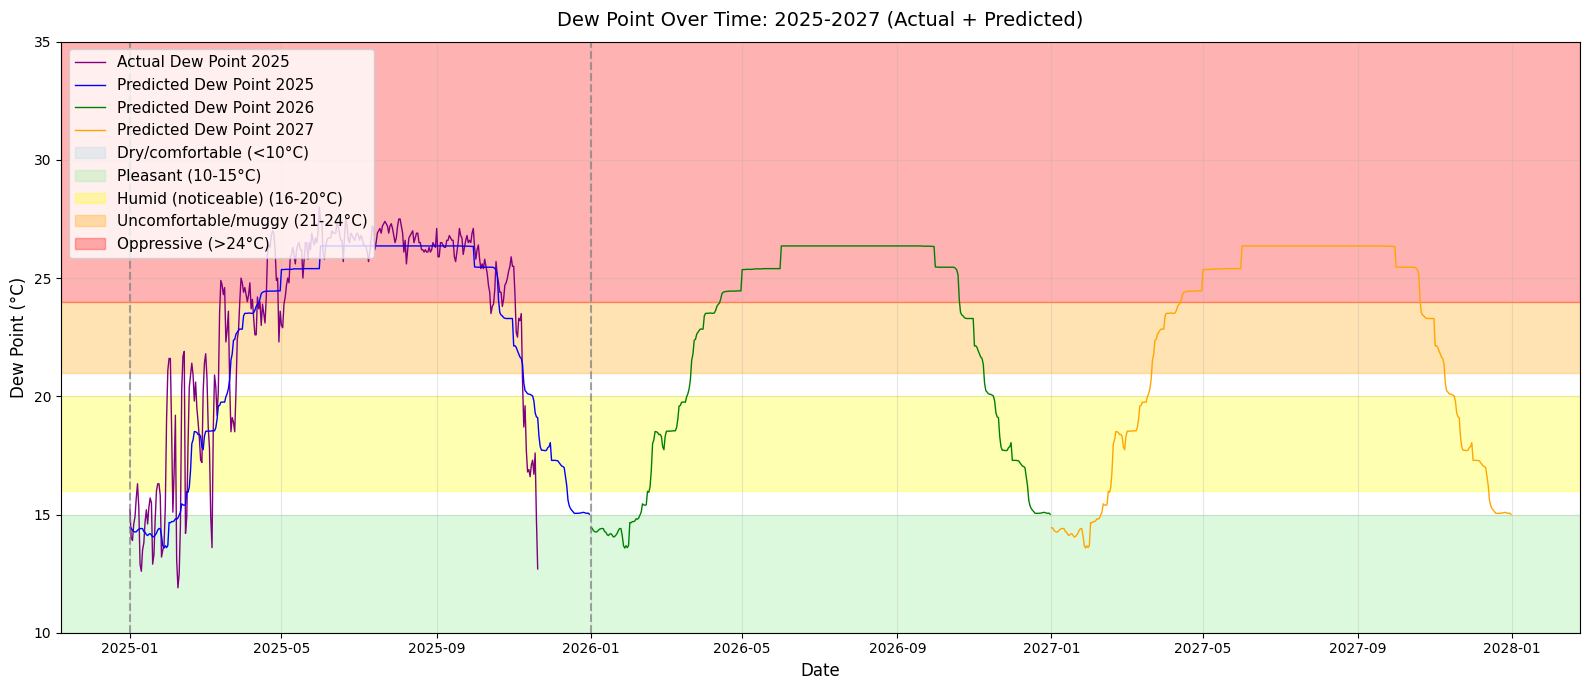

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the 2025 historical data (with day, month, year columns)
df_hist_2025 = pd.read_csv('Bagerhat_historical_weather_2025.csv')

# Create a 'date' column by combining 'year', 'month', and 'day'
df_hist_2025['date'] = pd.to_datetime(df_hist_2025[['year', 'month', 'day']])

# Set the 'date' column as the index
df_hist_2025 = df_hist_2025.set_index('date')

# Prepare the plot for 2025-2027 Dew Point categories
plt.figure(figsize=(16, 7))

# Plot the Actual Dew Points for 2025 (using all available data)
plt.plot(df_hist_2025.index, df_hist_2025['dew_point'], label='Actual Dew Point 2025', color='purple', linewidth=1)

# Plot the Predicted Dew Points for 2025-2027
plt.plot(future_2025_out['date'], future_2025_out['pred_dew_point'], label='Predicted Dew Point 2025', color='blue', linewidth=1)
plt.plot(future_2026_out['date'], future_2026_out['pred_dew_point'], label='Predicted Dew Point 2026', color='green', linewidth=1)
plt.plot(future_2027_out['date'], future_2027_out['pred_dew_point'], label='Predicted Dew Point 2027', color='orange', linewidth=1)

# Adding color bands for Dew Point categories (using axhspan)
# Dry/comfortable (<10°C) - Light Blue
plt.axhspan(0, 10, color='lightblue', alpha=0.3, label='Dry/comfortable (<10°C)')

# Pleasant (10-15°C) - Light Green
plt.axhspan(10, 15, color='lightgreen', alpha=0.3, label='Pleasant (10-15°C)')

# Humid (noticeable) (16-20°C) - Yellow
plt.axhspan(16, 20, color='yellow', alpha=0.3, label='Humid (noticeable) (16-20°C)')

# Uncomfortable/muggy (21-24°C) - Orange
plt.axhspan(21, 24, color='orange', alpha=0.3, label='Uncomfortable/muggy (21-24°C)')

# Oppressive (high risk of fatigue) (>24°C) - Red
plt.axhspan(24, 60, color='red', alpha=0.3, label='Oppressive (>24°C)')

# Styling the plot
plt.xlabel('Date', fontsize=12)
plt.ylabel('Dew Point (°C)', fontsize=12)
plt.title('Dew Point Over Time: 2025-2027 (Actual + Predicted)', fontsize=14, pad=12)
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)

# Year separators
plt.axvline(pd.to_datetime('2025-01-01'), color='gray', linestyle='--', alpha=0.7)
plt.axvline(pd.to_datetime('2026-01-01'), color='gray', linestyle='--', alpha=0.7)

# Set y-axis limits (from 10°C to 35°C)
plt.ylim(10, 35)

plt.tight_layout()
plt.show()
